In [94]:
!pip install xgboost

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import OneHotEncoder
import numpy as np
from sklearn.ensemble import HistGradientBoostingRegressor
import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor

In [21]:
pd.set_option('display.max_columns', None)
data = pd.read_csv("autos.csv")

In [22]:
data.drop(columns=["index", "dateCrawled","name","seller","offerType","abtest","monthOfRegistration","dateCreated","nrOfPictures","postalCode","lastSeen"], inplace=True)

In [90]:
data

,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage
0,480,NaN,1993,manuell,0,golf,150000,benzin,volkswagen,NaN
1,18300,coupe,2011,manuell,190,NaN,125000,diesel,audi,ja
2,9800,suv,2004,automatik,163,grand,125000,diesel,jeep,NaN
3,1500,kleinwagen,2001,manuell,75,golf,150000,benzin,volkswagen,nein
4,3600,kleinwagen,2008,manuell,69,fabia,90000,diesel,skoda,nein
...,...,...,...,...,...,...,...,...,...,...
371523,2200,NaN,2005,NaN,0,NaN,20000,NaN,sonstige_autos,NaN
371524,1199,cabrio,2000,automatik,101,fortwo,125000,benzin,smart,nein
371525,9200,bus,1996,manuell,102,transporter,150000,diesel,volkswagen,nein
371526,3400,kombi,2002,manuell,100,golf,150000,diesel,volkswagen,NaN


In [77]:
data.vehicleType.mode()

0    limousine
Name: vehicleType, dtype: object

In [128]:
data.vehicleType.value_counts()

limousine     117304
kleinwagen     67730
kombi          58593
bus            27155
cabrio         20734
coupe          17359
suv            13285
andere          3225
Name: vehicleType, dtype: int64

In [34]:
data.isnull().sum()

price                     0
vehicleType           37869
yearOfRegistration        0
gearbox               20209
powerPS                   0
model                 20484
kilometer                 0
fuelType              33386
brand                     0
notRepairedDamage     72060
dtype: int64

In [28]:
data.dropna(inplace=True)
data.drop_duplicates(inplace=True)
data = data[data.price != 0]
data = data[data.powerPS != 0]
data.reset_index(inplace=True,drop=True)

In [24]:
data

,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage
0,1500,kleinwagen,2001,manuell,75,golf,150000,benzin,volkswagen,nein
1,3600,kleinwagen,2008,manuell,69,fabia,90000,diesel,skoda,nein
2,650,limousine,1995,manuell,102,3er,150000,benzin,bmw,ja
3,2200,cabrio,2004,manuell,109,2_reihe,150000,benzin,peugeot,nein
4,2000,limousine,2004,manuell,105,3_reihe,150000,benzin,mazda,nein
...,...,...,...,...,...,...,...,...,...,...
220959,3999,kombi,2005,manuell,3,3er,150000,diesel,bmw,nein
220960,3200,limousine,2004,manuell,225,leon,150000,benzin,seat,ja
220961,1199,cabrio,2000,automatik,101,fortwo,125000,benzin,smart,nein
220962,9200,bus,1996,manuell,102,transporter,150000,diesel,volkswagen,nein


# Eksik Değerler

In [97]:
data.isnull().sum()

price                     0
vehicleType           32039
yearOfRegistration        0
gearbox               15788
powerPS                   0
model                 17428
kilometer                 0
fuelType              28549
brand                     0
notRepairedDamage     61185
dtype: int64

In [29]:
data['vehicleType'].fillna(data['vehicleType'].mode()[0],inplace=True)
data['gearbox'].fillna(data['gearbox'].mode()[0],inplace=True)
data['model'].fillna(data['model'].mode()[0],inplace=True)
data['fuelType'].fillna(data['fuelType'].mode()[0],inplace=True)
data['notRepairedDamage'].fillna(data['notRepairedDamage'].mode()[0],inplace=True)

In [301]:
data.isnull().sum()

price                 0
vehicleType           0
yearOfRegistration    0
gearbox               0
powerPS               0
model                 0
kilometer             0
fuelType              0
brand                 0
notRepairedDamage     0
dtype: int64

# Görselleştirme

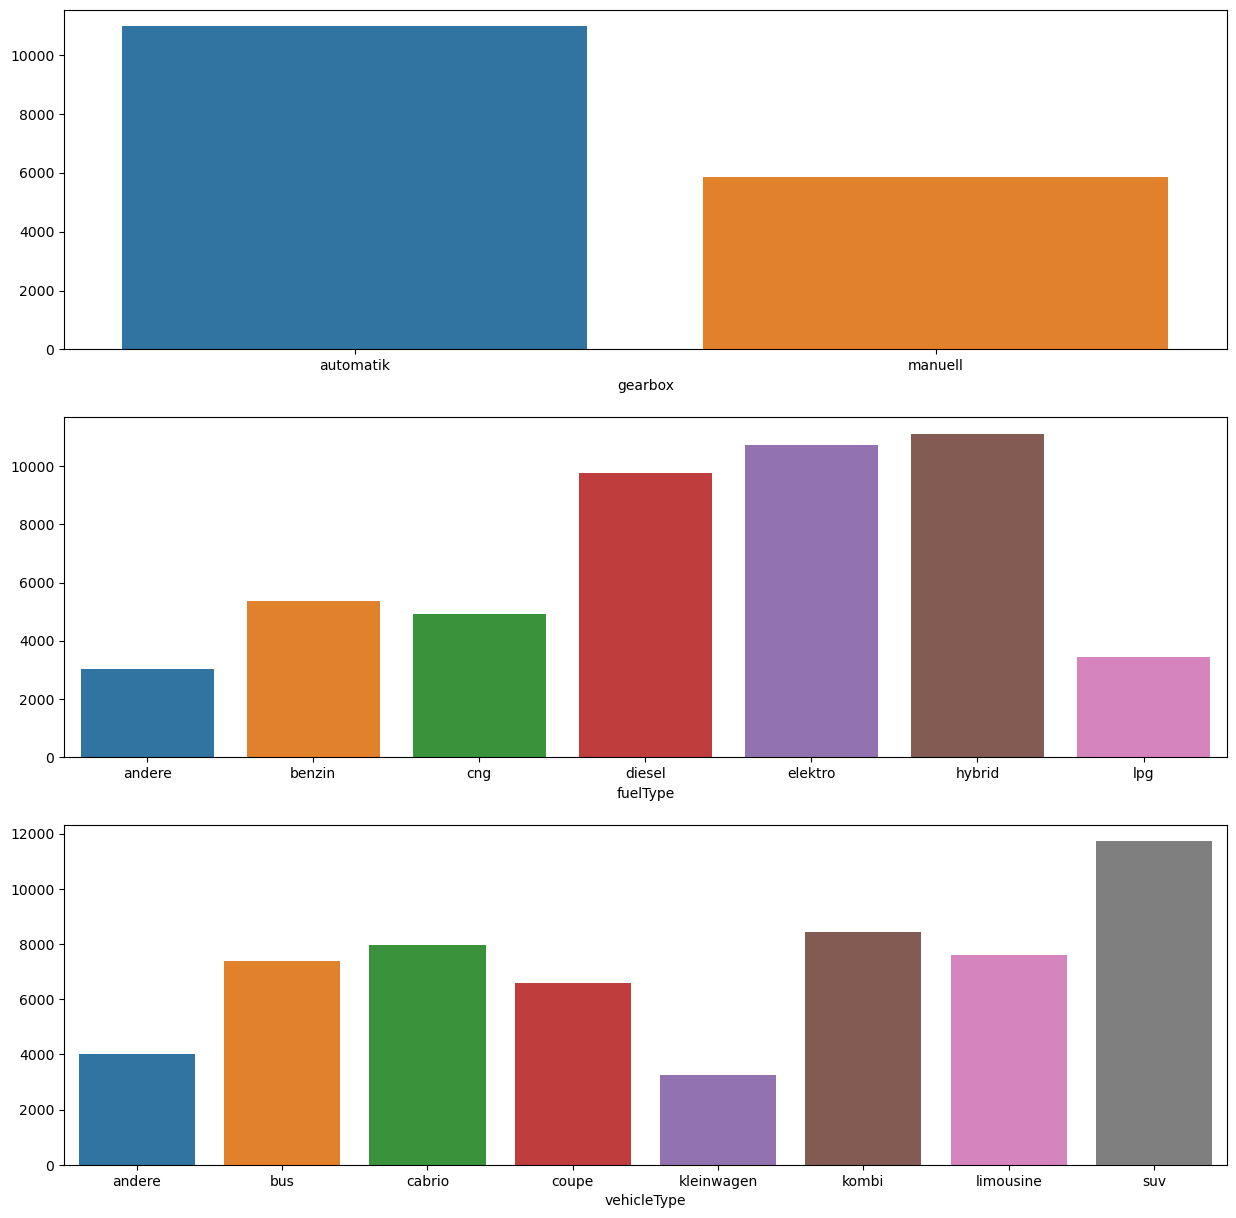

In [39]:
plt.figure(figsize=(15,15))
plt.subplot(3,1,1)
a=data.groupby("gearbox")['price'].mean()
sns.barplot(x=a.index,y=a.values);
plt.subplot(3,1,2)
b=data.groupby("fuelType")['price'].mean()
sns.barplot(x=b.index,y=b.values);
plt.subplot(3,1,3)
c=data.groupby("vehicleType")['price'].mean()
sns.barplot(x=c.index,y=c.values);

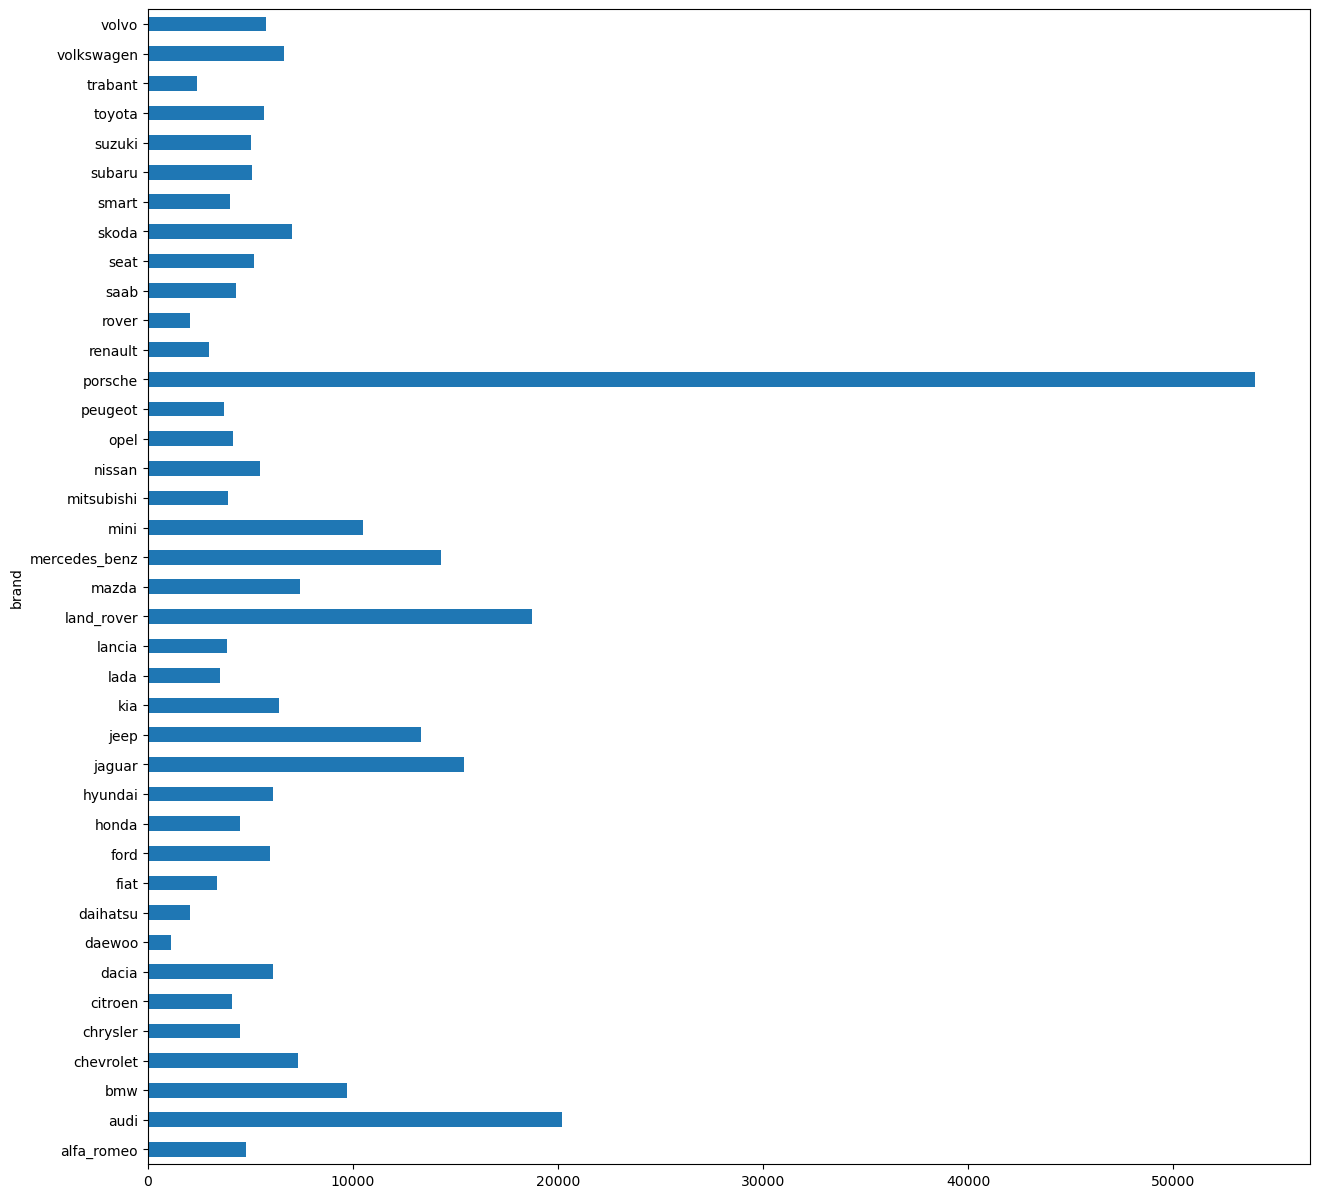

In [19]:
#Markalara göre fiyat ortalaması
plt.figure(figsize=(15,15))
data.groupby("brand")['price'].mean().plot.barh();

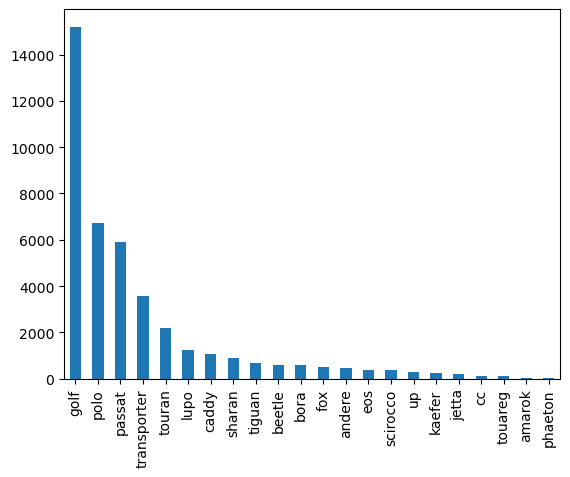

In [24]:
data_volkswagen=data.loc[data.brand == 'volkswagen']
data_volkswagen['model'].value_counts().plot(kind='bar');

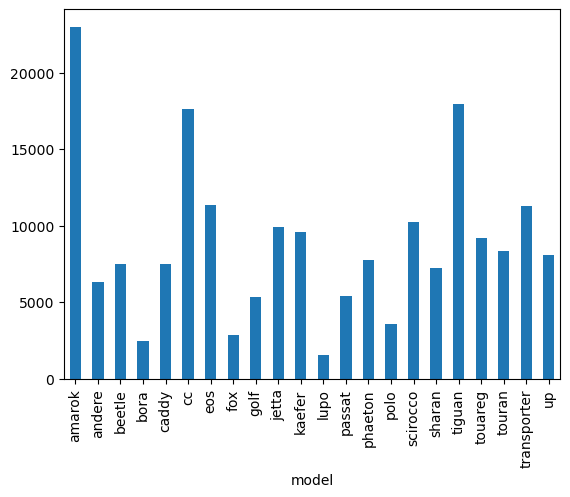

In [26]:
data_volkswagen.groupby("model")['price'].mean().plot(kind='bar');

In [9]:
data

,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage
0,1500,kleinwagen,2001,manuell,75,golf,150000,benzin,volkswagen,nein
1,3600,kleinwagen,2008,manuell,69,fabia,90000,diesel,skoda,nein
2,650,limousine,1995,manuell,102,3er,150000,benzin,bmw,ja
3,2200,cabrio,2004,manuell,109,2_reihe,150000,benzin,peugeot,nein
4,0,limousine,1980,manuell,50,andere,40000,benzin,volkswagen,nein
...,...,...,...,...,...,...,...,...,...,...
223682,3999,kombi,2005,manuell,3,3er,150000,diesel,bmw,nein
223683,3200,limousine,2004,manuell,225,leon,150000,benzin,seat,ja
223684,1199,cabrio,2000,automatik,101,fortwo,125000,benzin,smart,nein
223685,9200,bus,1996,manuell,102,transporter,150000,diesel,volkswagen,nein


#  Outliers

In [17]:
def aykiri_deger_silme(data,i):
    Q1 = data[i].quantile(0.25)
    Q3 = data[i].quantile(0.75)
    IQR = Q3-Q1
    alt_sınır= Q1 - 1.5*IQR
    üst_sınır= Q1 + 1.5*IQR
    if i == 'price':
        alt_sınır = 99
    elif i == 'powerPS':
        alt_sınır = 50
    aykiri_deger=(data[i] < alt_sınır) | (data[i] > üst_sınır)
    data[i]=data[i][~aykiri_deger]
    data.dropna(inplace=True)
    data.reset_index(inplace=True,drop=True)
    return data

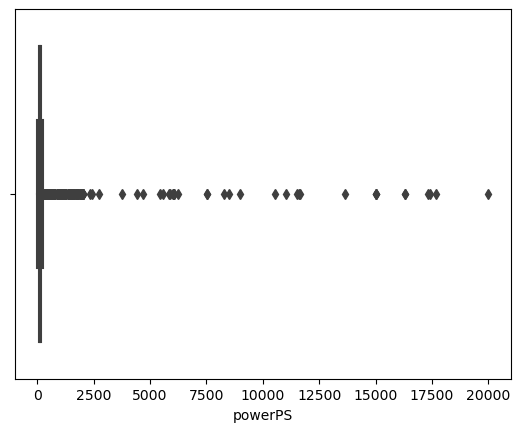

In [50]:
sns.boxplot(x=data['powerPS']);

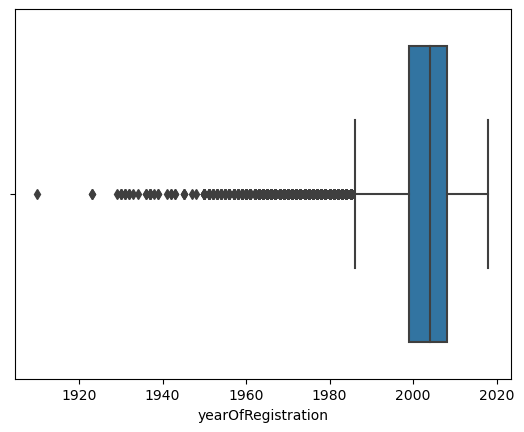

In [56]:
sns.boxplot(x=data['yearOfRegistration']);

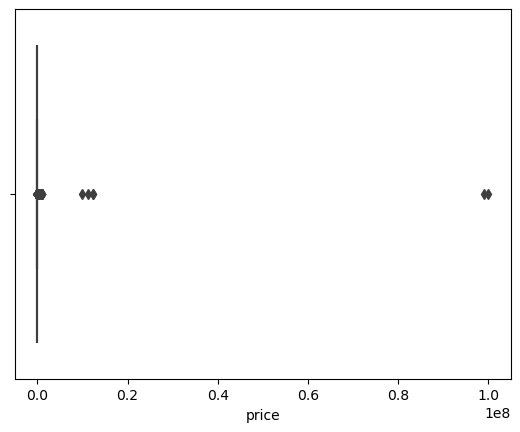

In [57]:
sns.boxplot(x=data['price']);

In [30]:
data=aykiri_deger_silme(data,'powerPS')
data=aykiri_deger_silme(data,'yearOfRegistration')
data=aykiri_deger_silme(data,'price')

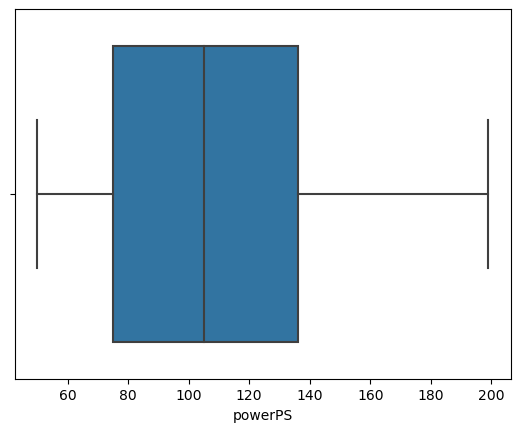

In [80]:
sns.boxplot(x=data['powerPS']);

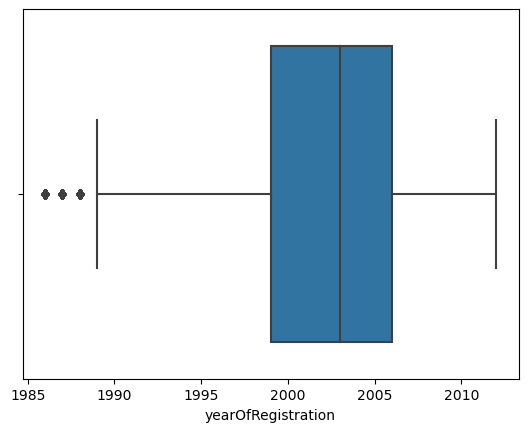

In [68]:
sns.boxplot(x=data['yearOfRegistration']);

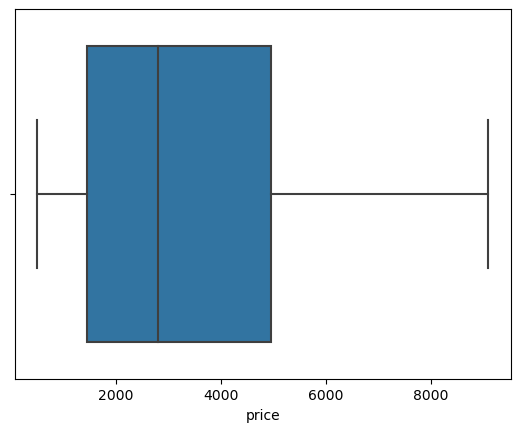

In [69]:
sns.boxplot(x=data['price']);

# Label

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147296 entries, 0 to 147295
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   price               147296 non-null  float64
 1   vehicleType         147296 non-null  object 
 2   yearOfRegistration  147296 non-null  float64
 3   gearbox             147296 non-null  object 
 4   powerPS             147296 non-null  float64
 5   model               147296 non-null  object 
 6   kilometer           147296 non-null  int64  
 7   fuelType            147296 non-null  object 
 8   brand               147296 non-null  object 
 9   notRepairedDamage   147296 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 11.2+ MB


In [31]:
#Label Encoder
le=LabelEncoder()
data.gearbox=le.fit_transform(data.gearbox.astype(str))
data.notRepairedDamage=le.fit_transform(data.notRepairedDamage.astype(str))

In [9]:
#Çok değişkenlilere one hot
ohe = OneHotEncoder()
def get_ohe(df,i):
    new_arrays=ohe.fit_transform(data[[i]]).toarray()
    our_labels=np.array(ohe.categories_).ravel()
    ohe_df=pd.DataFrame(new_arrays, columns=our_labels)
    df.drop(columns=[i], axis=1, inplace=True)
    new_df=pd.concat([data,ohe_df],axis=1)
    return new_df

In [32]:
data=get_ohe(data,'vehicleType')
data=get_ohe(data,'fuelType')
data=get_ohe(data,'brand')
data=get_ohe(data,'model')

In [33]:
# Model
X=data.drop('price',axis=1).values
y=data['price'].values

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.10,random_state=33)

In [120]:
lm=LinearRegression()
model=lm.fit(X_train,y_train)

In [78]:
y_pred = model.predict(X_test)

In [121]:
model.score(X_test,y_test)

0.5403222850726478

In [86]:
r2_score(y_test, y_pred)

0.5670328106537015

In [87]:
print("Mean Squared Error = ", mean_squared_error(y_test,y_pred))

Mean Squared Error =  2325630.2127612308


In [202]:
est = HistGradientBoostingRegressor().fit(X_train, y_train)
est.score(X_test, y_test)

0.7971177615859304

In [15]:
y_pred = est.predict(X_test)

In [16]:
r2_score(y_test, y_pred)

0.7083064060491326

In [47]:
model = xgb.XGBRegressor(max_depth=5, tree_method="hist", n_estimators = 650).fit(X_train, y_train)

In [48]:
pred = model.predict(X_test)
print(f"R2 Score : {r2_score(y_test, pred)}")

R2 Score : 0.8515919218745863


## KNN

In [36]:
knn_model = KNeighborsRegressor().fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

1099.3370639066093

## YSA

In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor

In [42]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [43]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [44]:
mlp_model = MLPRegressor(hidden_layer_sizes = (100,20)).fit(X_train_scaled, y_train)

C:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


In [ ]:
y_pred = mlp_model.predict(X_test_scaled)

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

## Final

In [13]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import OneHotEncoder
import numpy as np
from sklearn.ensemble import HistGradientBoostingRegressor
import xgboost as xgb

pd.set_option('display.max_columns', None)
data = pd.read_csv("autos.csv")
data.drop(columns=["index", "dateCrawled","abtest","name","seller","offerType","monthOfRegistration","dateCreated","nrOfPictures","postalCode","lastSeen"], inplace=True)

def cleaning(data):
    data.dropna(inplace=True)
    data.drop_duplicates(inplace=True)
    data = data[data.price != 0]
    data = data[data.powerPS != 0]
    data.reset_index(inplace=True,drop=True)
    return data

data = cleaning(data)

def aykiri_deger_silme(data,i):
    Q1 = data[i].quantile(0.25)
    Q3 = data[i].quantile(0.75)
    IQR = Q3-Q1
    alt_sınır= Q1 - 1.5*IQR
    üst_sınır= Q1 + 1.5*IQR
    if i == 'price':
        alt_sınır = 99
    elif i == 'powerPS':
        alt_sınır = 50
    aykiri_deger=(data[i] < alt_sınır) | (data[i] > üst_sınır)
    data[i]=data[i][~aykiri_deger]
    data.dropna(inplace=True)
    data.reset_index(inplace=True,drop=True)
    return data

data=aykiri_deger_silme(data,'powerPS')
data=aykiri_deger_silme(data,'yearOfRegistration')
data=aykiri_deger_silme(data,'price')

#Label Encoder
le=LabelEncoder()
data['gearbox'] = le.fit_transform(data['gearbox'])
data['notRepairedDamage'] = le.fit_transform(data['notRepairedDamage'])

#Çok değişkenlilere one hot
ohe = OneHotEncoder()
def get_ohe(df,i):
    new_arrays=ohe.fit_transform(df[[i]]).toarray()
    our_labels=np.array(ohe.categories_).ravel()
    ohe_df=pd.DataFrame(new_arrays, columns=our_labels)
    df.drop(columns=[i], axis=1, inplace=True)
    new_df=pd.concat([df,ohe_df],axis=1)
    return new_df

data=get_ohe(data,'vehicleType')
data=get_ohe(data,'fuelType')
data=get_ohe(data,'brand')
data=get_ohe(data,'model')

# Model
X=data.drop('price',axis=1).values
y=data['price'].values

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.10,random_state=33)

model = xgb.XGBRegressor(max_depth=5,tree_method="hist", n_estimators = 650).fit(X_train, y_train)
pred = model.predict(X_test)
print(f"R2 Score : {r2_score(y_test, pred)}")

R2 Score : 0.852382428707192


In [15]:
def tahmin(test):
    pd.set_option('display.max_columns', None)
    data = pd.read_csv("autos.csv")
    data.drop(columns=["index", "dateCrawled","abtest","name","seller","offerType","monthOfRegistration","dateCreated","nrOfPictures","postalCode","lastSeen"], inplace=True)

    def cleaning(data):
        data.dropna(inplace=True)
        data.drop_duplicates(inplace=True)
        data = data[data.price != 0]
        data = data[data.powerPS != 0]
        data.reset_index(inplace=True,drop=True)
        return data

    data = cleaning(data)
    
    def get_ohe(df,i,test):
        new_arrays=ohe.fit_transform(df[[i]]).toarray()
        our_labels=np.array(ohe.categories_).ravel()
        ohe_df=pd.DataFrame(new_arrays, columns=our_labels)
        df.drop(columns=[i], axis=1, inplace=True)
        new_df=pd.concat([df,ohe_df],axis=1)
        
        new_arrays=ohe.transform(test[[i]]).toarray()
        our_labels=np.array(ohe.categories_).ravel()
        ohe_df=pd.DataFrame(new_arrays, columns=our_labels)
        test.drop(columns=[i], axis=1, inplace=True)
        test=pd.concat([test,ohe_df],axis=1)
        return new_df,test
    '''
    def new_ohe(df,i):
        new_arrays=ohe.transform(df[[i]]).toarray()
        our_labels=np.array(ohe.categories_).ravel()
        ohe_df=pd.DataFrame(new_arrays, columns=our_labels)
        df.drop(columns=[i], axis=1, inplace=True)
        new_df=pd.concat([df,ohe_df],axis=1)
        return new_df 
    '''
    data,test=get_ohe(data,'vehicleType',test) 
    data,test=get_ohe(data,'fuelType',test)
    data,test=get_ohe(data,'brand',test)
    data,test=get_ohe(data,'model',test)
    
    
    data['gearbox'] = le.fit_transform(data['gearbox'])
    test['gearbox'] = le.transform(test['gearbox'])
    data['notRepairedDamage'] = le.fit_transform(data['notRepairedDamage'])
    test['notRepairedDamage'] = le.transform(test['notRepairedDamage'])
    
    test.drop(['trabant', '601','911','b_max','boxster','cayenne','discovery_sport','gl','q7','range_rover_evoque','rangerover','serie_2','serie_3'], axis=1,inplace=True)
    a = model.predict(test)
    
    return a

In [14]:
x = {'vehicleType':['limousine'],'yearOfRegistration':[2013],'gearbox':['automatik'],'powerPS':[105],'model':['jetta'],'kilometer':[250000],'fuelType':['diesel'],'brand':['volkswagen'],'notRepairedDamage':['nein']}

In [16]:
test=pd.DataFrame.from_dict(x)

In [17]:
test

,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage
0,limousine,2013,automatik,105,jetta,250000,diesel,volkswagen,nein


In [12]:
data[data['model']=='jetta'][data['kilometer']==150000][data['yearOfRegistration']>2010] 

C:\Users\GÖKBERK\AppData\Local\Temp\ipykernel_21928\618456368.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[data['model']=='jetta'][data['kilometer']==150000][data['yearOfRegistration']>2010]


,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage
146835,9990,limousine,2012,automatik,105,jetta,150000,diesel,volkswagen,nein


In [18]:
sonuç=tahmin(test)
sonuç

array([7150.292], dtype=float32)

In [120]:
data.shape

(147194, 297)

In [122]:
data.head()

,price,yearOfRegistration,gearbox,powerPS,kilometer,notRepairedDamage,andere,bus,cabrio,coupe,kleinwagen,kombi,limousine,suv,andere,benzin,cng,diesel,elektro,hybrid,lpg,alfa_romeo,audi,bmw,chevrolet,chrysler,citroen,dacia,daewoo,daihatsu,fiat,ford,honda,hyundai,jaguar,jeep,kia,lada,lancia,land_rover,mazda,mercedes_benz,mini,mitsubishi,nissan,opel,peugeot,porsche,renault,rover,saab,seat,skoda,smart,subaru,suzuki,toyota,volkswagen,volvo,100,145,147,156,159,1_reihe,1er,200,2_reihe,300c,3_reihe,3er,4_reihe,500,5_reihe,5er,6_reihe,6er,7er,80,850,90,900,9000,a1,a2,a3,a4,a5,a6,a8,a_klasse,accord,agila,alhambra,almera,altea,amarok,andere,antara,arosa,astra,auris,avensis,aveo,aygo,b_klasse,beetle,berlingo,bora,bravo,c1,c2,c3,c4,c5,c_klasse,c_max,c_reihe,caddy,calibra,captiva,carisma,carnival,cc,ceed,charade,cherokee,citigo,civic,cl,clio,clk,clubman,colt,combo,cooper,cordoba,corolla,corsa,cr_reihe,croma,crossfire,cuore,cx_reihe,defender,delta,discovery,doblo,ducato,duster,e_klasse,elefantino,eos,escort,espace,exeo,fabia,fiesta,focus,forester,forfour,fortwo,fox,freelander,fusion,g_klasse,galant,galaxy,getz,glk,golf,grand,i3,i_reihe,ibiza,impreza,insignia,jazz,jetta,jimny,juke,justy,ka,kadett,kaefer,kalina,kalos,kangoo,kappa,kuga,laguna,lancer,lanos,legacy,leon,lodgy,logan,lupo,lybra,m_klasse,m_reihe,materia,matiz,megane,meriva,micra,mii,modus,mondeo,move,musa,mustang,mx_reihe,navara,niva,note,nubira,octavia,omega,one,outlander,pajero,panda,passat,phaeton,picanto,polo,primera,ptcruiser,punto,q3,q5,qashqai,r19,range_rover,range_rover_sport,rav,rio,roadster,roomster,rx_reihe,s60,s_klasse,s_max,s_type,samara,sandero,santa,scenic,scirocco,seicento,sharan,signum,sirion,sl,slk,sorento,spark,spider,sportage,sprinter,stilo,superb,swift,terios,tigra,tiguan,toledo,touareg,touran,transit,transporter,tt,tucson,twingo,up,v40,v50,v60,v70,v_klasse,vectra,verso,viano,vito,vivaro,voyager,wrangler,x_reihe,x_trail,x_type,xc_reihe,yaris,yeti,ypsilon,z_reihe,zafira
0,1500.0,2001.0,1,75.0,150000,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3600.0,2008.0,1,69.0,90000,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [121]:
sonuç.shape

(1, 309)

In [123]:
sonuç

,yearOfRegistration,gearbox,powerPS,kilometer,notRepairedDamage,andere,bus,cabrio,coupe,kleinwagen,kombi,limousine,suv,andere,benzin,cng,diesel,elektro,hybrid,lpg,alfa_romeo,audi,bmw,chevrolet,chrysler,citroen,dacia,daewoo,daihatsu,fiat,ford,honda,hyundai,jaguar,jeep,kia,lada,lancia,land_rover,mazda,mercedes_benz,mini,mitsubishi,nissan,opel,peugeot,porsche,renault,rover,saab,seat,skoda,smart,subaru,suzuki,toyota,trabant,volkswagen,volvo,100,145,147,156,159,1_reihe,1er,200,2_reihe,300c,3_reihe,3er,4_reihe,500,5_reihe,5er,601,6_reihe,6er,7er,80,850,90,900,9000,911,a1,a2,a3,a4,a5,a6,a8,a_klasse,accord,agila,alhambra,almera,altea,amarok,andere,antara,arosa,astra,auris,avensis,aveo,aygo,b_klasse,b_max,beetle,berlingo,bora,boxster,bravo,c1,c2,c3,c4,c5,c_klasse,c_max,c_reihe,caddy,calibra,captiva,carisma,carnival,cayenne,cc,ceed,charade,cherokee,citigo,civic,cl,clio,clk,clubman,colt,combo,cooper,cordoba,corolla,corsa,cr_reihe,croma,crossfire,cuore,cx_reihe,defender,delta,discovery,discovery_sport,doblo,ducato,duster,e_klasse,elefantino,eos,escort,espace,exeo,fabia,fiesta,focus,forester,forfour,fortwo,fox,freelander,fusion,g_klasse,galant,galaxy,getz,gl,glk,golf,grand,i3,i_reihe,ibiza,impreza,insignia,jazz,jetta,jimny,juke,justy,ka,kadett,kaefer,kalina,kalos,kangoo,kappa,kuga,laguna,lancer,lanos,legacy,leon,lodgy,logan,lupo,lybra,m_klasse,m_reihe,materia,matiz,megane,meriva,micra,mii,modus,mondeo,move,musa,mustang,mx_reihe,navara,niva,note,nubira,octavia,omega,one,outlander,pajero,panda,passat,phaeton,picanto,polo,primera,ptcruiser,punto,q3,q5,q7,qashqai,r19,range_rover,range_rover_evoque,range_rover_sport,rangerover,rav,rio,roadster,roomster,rx_reihe,s60,s_klasse,s_max,s_type,samara,sandero,santa,scenic,scirocco,seicento,serie_2,serie_3,sharan,signum,sirion,sl,slk,sorento,spark,spider,sportage,sprinter,stilo,superb,swift,terios,tigra,tiguan,toledo,touareg,touran,transit,transporter,tt,tucson,twingo,up,v40,v50,v60,v70,v_klasse,vectra,verso,viano,vito,vivaro,voyager,wrangler,x_reihe,x_trail,x_type,xc_reihe,yaris,yeti,ypsilon,z_reihe,zafira
0,2013,0,105,250000,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [78]:
k=1
res=[]
#for i in range(10):
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.10,random_state=33)

model = xgb.XGBRegressor(max_depth=5,tree_method="hist", n_estimators = 650).fit(X_train, y_train)
pred = model.predict(X_test)
print(f"R2 Score : {r2_score(y_test, pred)}")
k=k+1
res.append(r2_score(y_test, pred))
   

R2 Score : 0.852382428707192


In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
#import matplotlib.pyplot as plt
#import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import OneHotEncoder
import numpy as np
from flask import Flask, request ,jsonify
import xgboost as xgb

pd.set_option('display.max_columns', None)
data = pd.read_csv("autos.csv")
data.drop(columns=["index", "dateCrawled","abtest","name","seller","offerType","monthOfRegistration","dateCreated","nrOfPictures","postalCode","lastSeen"], inplace=True)

def cleaning(data):
    data.dropna(inplace=True)
    data.drop_duplicates(inplace=True)
    data = data[data.price != 0]
    data = data[data.powerPS != 0]
    data.reset_index(inplace=True,drop=True)
    return data

data = cleaning(data)

def aykiri_deger_silme(data,i):
    Q1 = data[i].quantile(0.25)
    Q3 = data[i].quantile(0.75)
    IQR = Q3-Q1
    alt_sınır= Q1 - 1.5*IQR
    üst_sınır= Q1 + 1.5*IQR
    if i == 'price':
        alt_sınır = 99
    elif i == 'powerPS':
        alt_sınır = 50
    aykiri_deger=(data[i] < alt_sınır) | (data[i] > üst_sınır)
    data[i]=data[i][~aykiri_deger]
    data.dropna(inplace=True)
    data.reset_index(inplace=True,drop=True)
    return data

data=aykiri_deger_silme(data,'powerPS')
data=aykiri_deger_silme(data,'yearOfRegistration')
data=aykiri_deger_silme(data,'price')

#Label Encoder
le=LabelEncoder()
data['gearbox'] = le.fit_transform(data['gearbox'])
data['notRepairedDamage'] = le.fit_transform(data['notRepairedDamage'])

#Çok değişkenlilere one hot
ohe = OneHotEncoder()
def get_ohe(df,i):
    new_arrays=ohe.fit_transform(df[[i]]).toarray()
    our_labels=np.array(ohe.categories_).ravel()
    ohe_df=pd.DataFrame(new_arrays, columns=our_labels)
    df.drop(columns=[i], axis=1, inplace=True)
    new_df=pd.concat([df,ohe_df],axis=1)
    return new_df

data=get_ohe(data,'vehicleType')
data=get_ohe(data,'fuelType')
data=get_ohe(data,'brand')
data=get_ohe(data,'model')

# Model
X=data.drop('price',axis=1).values
y=data['price'].values

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.10,random_state=33)

model = xgb.XGBRegressor(max_depth=5,tree_method="hist", n_estimators = 650).fit(X_train, y_train)
pred = model.predict(X_test)
print(f"R2 Score : {r2_score(y_test, pred)}")

def tahmin(test):
    pd.set_option('display.max_columns', None)
    data = pd.read_csv("autos.csv")
    data.drop(columns=["index", "dateCrawled","abtest","name","seller","offerType","monthOfRegistration","dateCreated","nrOfPictures","postalCode","lastSeen"], inplace=True)

    def cleaning(data):
        data.dropna(inplace=True)
        data.drop_duplicates(inplace=True)
        data = data[data.price != 0]
        data = data[data.powerPS != 0]
        data.reset_index(inplace=True,drop=True)
        return data

    data = cleaning(data)
    
    def get_ohe(df,i,test):
        new_arrays=ohe.fit_transform(df[[i]]).toarray()
        our_labels=np.array(ohe.categories_).ravel()
        ohe_df=pd.DataFrame(new_arrays, columns=our_labels)
        df.drop(columns=[i], axis=1, inplace=True)
        new_df=pd.concat([df,ohe_df],axis=1)
        
        new_arrays=ohe.transform(test[[i]]).toarray()
        our_labels=np.array(ohe.categories_).ravel()
        ohe_df=pd.DataFrame(new_arrays, columns=our_labels)
        test.drop(columns=[i], axis=1, inplace=True)
        test=pd.concat([test,ohe_df],axis=1)
        return new_df,test
 
    data,test=get_ohe(data,'vehicleType',test) 
    data,test=get_ohe(data,'fuelType',test)
    data,test=get_ohe(data,'brand',test)
    data,test=get_ohe(data,'model',test)
    
    data['gearbox'] = le.fit_transform(data['gearbox'])
    test['gearbox'] = le.transform(test['gearbox'])
    data['notRepairedDamage'] = le.fit_transform(data['notRepairedDamage'])
    test['notRepairedDamage'] = le.transform(test['notRepairedDamage'])
    
    test.drop(['trabant', '601','911','b_max','boxster','cayenne','discovery_sport','gl','q7','range_rover_evoque','rangerover','serie_2','serie_3'], axis=1,inplace=True)
    a = model.predict(test)
    
    return a

def test_degerleri (a,b,c,d,e,f,g,h,i):
    x = {'vehicleType':[a],'yearOfRegistration':[b],'gearbox':[c],'powerPS':[d],'model':[e],'kilometer':[f],'fuelType':[g],'brand':[h],'notRepairedDamage':[i]}
    test=pd.DataFrame.from_dict(x)
    res=tahmin(test)
    return res
'''
app = Flask(__name__) 
    
@app.route('/car_predict', methods = ['POST'])

def upload_page():
    try:
        a = request.json['vehicleType']
        b = request.json['yearOfRegistration']
        c = request.json['gearbox'] 
        d = request.json['powerPS']
        e = request.json['model']
        f = request.json['kilometer']
        g = request.json['fuelType']
        h = request.json['brand']
        i = request.json['notRepairedDamage']
        return test_degerleri(a,b,c,d,e,f,g,h,i)
    
    except Exception as y:
        response={}
        response['ErrorMessage'] = str(y)
        response['HasFailed']= True
        return response
    
if __name__ == "__main__":
    app.run(debug=True,use_reloader=False)
'''

a = "limousine"
b = 2013
c = "automatik"
d = 105
e = "jetta"
f = 250000
g = "diesel"
h = "volkswagen"
i = "nein"
final = test_degerleri(a,b,c,d,e,f,g,h,i)
final

R2 Score : 0.852382428707192


array([7150.292], dtype=float32)

In [5]:
str(final[0])

'7150.292'

In [3]:
import pandas as pd

In [4]:
pd.set_option('display.max_columns', None)
data = pd.read_csv("autos.csv")
data.drop(columns=["index", "dateCrawled","abtest","name","seller","offerType","monthOfRegistration","dateCreated","nrOfPictures","postalCode","lastSeen"], inplace=True)

def cleaning(data):
    data.dropna(inplace=True)
    data.drop_duplicates(inplace=True)
    data = data[data.price != 0]
    data = data[data.powerPS != 0]
    data.reset_index(inplace=True,drop=True)
    return data

data = cleaning(data)

In [5]:
data.powerPS.unique()

array([   75,    69,   102,   109,   105,   140,   190,   136,   160,
         231,    50,   118,   193,    99,    60,   113,   218,   122,
         129,    70,    95,   177,   306,    61,   101,   232,   156,
          80,    82,   204,   155,   150,    87,    86,   131,   143,
         303,   125,   224,   235,   200,   178,   265,   163,    77,
         110,   120,    54,   286,   170,   116,   184,    88,    64,
         305,   197,   179,    90,   250,   313,    45,    98,   115,
         130,   114,   211,    56,   326,   201,   213,   107,   174,
         220,   185,    73,    41,   192,    66,    58,    52,   510,
         147,    71,    97,    65,   239,   295,    68,   203,   144,
         300,   103,    85,   245,   258,   292,   320,    63,    81,
         148,   354,    44,   145,   180,   280,   260,   457,   104,
         409,   333,   117,   141,    55,   132,   165,   234,   158,
          39,   272,    92,   135,   230,    53,   435,    84,   209,
         146,    67,

In [3]:
def tahmin(test):
    pd.set_option('display.max_columns', None)
    data = pd.read_csv("autos.csv")
    data.drop(columns=["index", "dateCrawled","abtest","name","seller","offerType","monthOfRegistration","dateCreated","nrOfPictures","postalCode","lastSeen"], inplace=True)

    def cleaning(data):
        data.dropna(inplace=True)
        data.drop_duplicates(inplace=True)
        data = data[data.price != 0]
        data = data[data.powerPS != 0]
        data.reset_index(inplace=True,drop=True)
        return data

    data = cleaning(data)
    
    def get_ohe(df,i,test):
        new_arrays=ohe.fit_transform(df[[i]]).toarray()
        our_labels=np.array(ohe.categories_).ravel()
        ohe_df=pd.DataFrame(new_arrays, columns=our_labels)
        df.drop(columns=[i], axis=1, inplace=True)
        new_df=pd.concat([df,ohe_df],axis=1)
        
        new_arrays=ohe.transform(test[[i]]).toarray()
        our_labels=np.array(ohe.categories_).ravel()
        ohe_df=pd.DataFrame(new_arrays, columns=our_labels)
        test.drop(columns=[i], axis=1, inplace=True)
        test=pd.concat([test,ohe_df],axis=1)
        return new_df,test
    '''
    def new_ohe(df,i):
        new_arrays=ohe.transform(df[[i]]).toarray()
        our_labels=np.array(ohe.categories_).ravel()
        ohe_df=pd.DataFrame(new_arrays, columns=our_labels)
        df.drop(columns=[i], axis=1, inplace=True)
        new_df=pd.concat([df,ohe_df],axis=1)
        return new_df 
    '''
    data,test=get_ohe(data,'vehicleType',test) 
    data,test=get_ohe(data,'fuelType',test)
    data,test=get_ohe(data,'brand',test)
    data,test=get_ohe(data,'model',test)
    
    
    data['gearbox'] = le.fit_transform(data['gearbox'])
    test['gearbox'] = le.transform(test['gearbox'])
    data['notRepairedDamage'] = le.fit_transform(data['notRepairedDamage'])
    test['notRepairedDamage'] = le.transform(test['notRepairedDamage'])
    
    test.drop(['trabant', '601','911','b_max','boxster','cayenne','discovery_sport','gl','q7','range_rover_evoque','rangerover','serie_2','serie_3'], axis=1,inplace=True)
    a = model.predict(test)
    
    return a

In [6]:
pd.set_option('display.max_columns', None)
data = pd.read_csv("autos.csv")
data.drop(columns=["index", "dateCrawled","abtest","name","seller","offerType","monthOfRegistration","dateCreated","nrOfPictures","postalCode","lastSeen"], inplace=True)

def cleaning(data):
    data.dropna(inplace=True)
    data.drop_duplicates(inplace=True)
    data = data[data.price != 0]
    data = data[data.powerPS != 0]
    data.reset_index(inplace=True,drop=True)
    return data

data = cleaning(data)

In [7]:
data.head()

,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage
0,1500,kleinwagen,2001,manuell,75,golf,150000,benzin,volkswagen,nein
1,3600,kleinwagen,2008,manuell,69,fabia,90000,diesel,skoda,nein
2,650,limousine,1995,manuell,102,3er,150000,benzin,bmw,ja
3,2200,cabrio,2004,manuell,109,2_reihe,150000,benzin,peugeot,nein
4,2000,limousine,2004,manuell,105,3_reihe,150000,benzin,mazda,nein


In [13]:
data[data.model == 'jetta'][data.price	> 7000]

C:\Users\GÖKBERK\AppData\Local\Temp\ipykernel_7040\660830217.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[data.model == 'jetta'][data.price	> 7000]


,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage
1452,7500,limousine,2007,manuell,102,jetta,80000,benzin,volkswagen,nein
1793,8999,limousine,2009,manuell,140,jetta,150000,diesel,volkswagen,nein
11134,8000,limousine,2009,manuell,102,jetta,90000,benzin,volkswagen,nein
12566,9300,limousine,2011,manuell,105,jetta,70000,benzin,volkswagen,nein
22302,10990,limousine,2012,manuell,105,jetta,80000,benzin,volkswagen,nein
...,...,...,...,...,...,...,...,...,...,...
200996,11990,limousine,2011,manuell,105,jetta,60000,benzin,volkswagen,nein
205943,999990,limousine,1985,manuell,111,jetta,150000,benzin,volkswagen,ja
206447,12300,limousine,2011,manuell,105,jetta,60000,benzin,volkswagen,nein
210407,12750,limousine,2011,manuell,140,jetta,125000,diesel,volkswagen,nein


In [76]:
# İlk dataframe
df1 = pd.DataFrame({'col1': [1, 2, 3, 4],
                    'col2': ['A', 'B', 'C', 'D']})

# İkinci dataframe
df2 = pd.DataFrame({'col1': [1, 2, 4, 3],
                    'col2': ['D', 'A', 'B', 'C']})

# LabelEncoder nesnesi oluşturuluyor
label_encoder = LabelEncoder()

# İlk dataframe için fit_transform
df1['col1'] = label_encoder.fit_transform(df1['col1'])
df2['col1'] = label_encoder.transform(df2['col1'])
df1['col2'] = label_encoder.fit_transform(df1['col2'])

# İkinci dataframe için transform
df2['col2'] = label_encoder.transform(df2['col2'])

print(df1)
print(df2)

   col1  col2
0     0     0
1     1     1
2     2     2
3     3     3
   col1  col2
0     0     3
1     1     0
2     3     1
3     2     2
